In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd /content/drive/My Drive

Mounted at /content/drive/
/content/drive/My Drive


In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.svm import SVC

In [3]:
##########
# Part 1 #
##########

In [4]:
# load dataset
ds = np.genfromtxt('hw2/binclass.txt',delimiter=',')
print('dataset shape',ds.shape)
y = ds[:,-1].copy()
X = ds[:,:-1].copy()
print("X shape",X.shape)

# Here 0 refers to label -1 label whereas 1 refers to label 1 
# p0,p1 are given class priors
p0=0.5
p1=0.5

# Estimating parameters through MLE
mean0 = np.mean(X[y==-1],axis=0)
mean1 = np.mean(X[y==1],axis=0)
sigma0 = np.cov(X[y==-1],rowvar=False)
sigma1 = np.cov(X[y==1],rowvar=False)

dataset shape (400, 3)
X shape (400, 2)


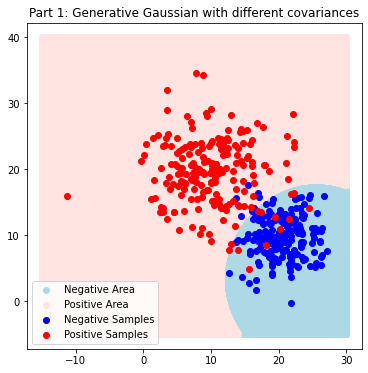

In [5]:
#Plotting learned decision boudaries for different covariance matrices for classes
xlim = (-15,30)
ylim = (-5, 40)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                     np.linspace(ylim[0], ylim[1], 1000))

prob_0 = multivariate_normal(mean0,sigma0,allow_singular=True)
prob_1 = multivariate_normal(mean1,sigma1,allow_singular=True)

mesh = np.c_[xx.ravel(), yy.ravel()]
pred0 = prob_0.pdf(mesh)
pred1 = prob_1.pdf(mesh)

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 1: Generative Gaussian with different covariances')
plt.legend(loc='lower left')
plt.show()

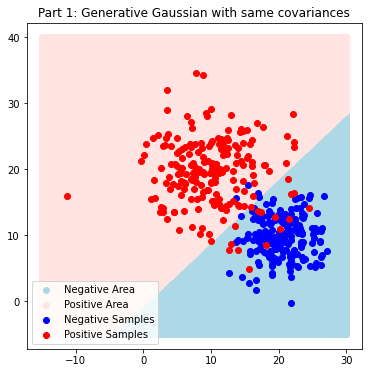

In [6]:
#For same covariance matrices assuming them to be average of 2 calculated
sigma_avg = (sigma0+sigma1)/2

xlim = (-15,30)
ylim = (-5, 40)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

prob_0 = multivariate_normal(mean0,sigma_avg,allow_singular=True)
prob_1 = multivariate_normal(mean1,sigma_avg,allow_singular=True)

mesh = np.c_[xx.ravel(), yy.ravel()]
pred0 = prob_0.pdf(mesh)
pred1 = prob_1.pdf(mesh)

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 1: Generative Gaussian with same covariances')
plt.legend(loc='lower left')
plt.show()

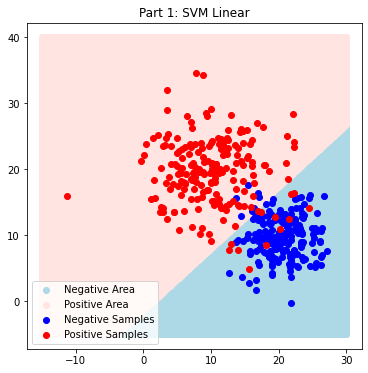

In [7]:
#SVM Linear
svm_linear = SVC(kernel='linear',probability=True)
hist = svm_linear.fit(X, y)

#Plotting SVM Linear
xlim = (-15,30)
ylim = (-5, 40)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

mesh = np.c_[xx.ravel(), yy.ravel()]
prob = svm_linear.predict_proba(np.c_[xx.ravel(), yy.ravel()])
pred0 = prob[:,0]
pred1 = prob[:,1]

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 1: SVM Linear')
plt.legend(loc='lower left')
plt.show()

In [8]:
##########
# Part 2 #
##########

In [9]:
# load dataset
ds = np.genfromtxt('hw2/binclassv2.txt',delimiter=',')
print('dataset shape',ds.shape)
y = ds[:,-1].copy()
X = ds[:,:-1].copy()
print("X shape",X.shape)

# Here 0 refers to label -1 label whereas 1 refers to label 1 
# p0,p1 are given class priors
p0=0.5
p1=0.5

# Estimating parameters through MLE
mean0 = np.mean(X[y==-1],axis=0)
mean1 = np.mean(X[y==1],axis=0)
sigma0 = np.cov(X[y==-1],rowvar=False)
sigma1 = np.cov(X[y==1],rowvar=False)

dataset shape (400, 3)
X shape (400, 2)


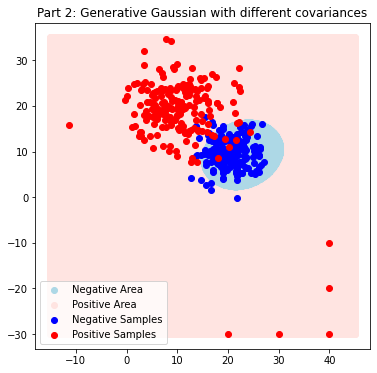

In [10]:
#Plotting learned decision boudaries for different covariance matrices for classes
xlim = (-15,45)
ylim = (-30,35)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                     np.linspace(ylim[0], ylim[1], 1000))

prob_0 = multivariate_normal(mean0,sigma0,allow_singular=True)
prob_1 = multivariate_normal(mean1,sigma1,allow_singular=True)

mesh = np.c_[xx.ravel(), yy.ravel()]
pred0 = prob_0.pdf(mesh)
pred1 = prob_1.pdf(mesh)

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 2: Generative Gaussian with different covariances')
plt.legend(loc='lower left')
plt.show()

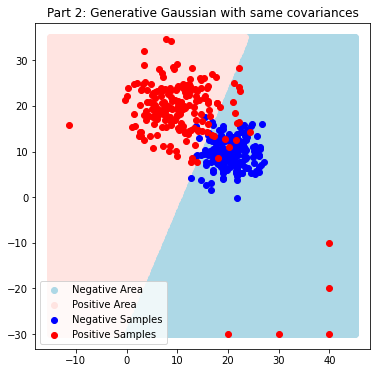

In [11]:
#For same covariance matrices assuming them to be average of 2 calculated
sigma_avg = (sigma0+sigma1)/2

xlim = (-15,45)
ylim = (-30,35)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

prob_0 = multivariate_normal(mean0,sigma_avg,allow_singular=True)
prob_1 = multivariate_normal(mean1,sigma_avg,allow_singular=True)

mesh = np.c_[xx.ravel(), yy.ravel()]
pred0 = prob_0.pdf(mesh)
pred1 = prob_1.pdf(mesh)

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 2: Generative Gaussian with same covariances')
plt.legend(loc='lower left')
plt.show()

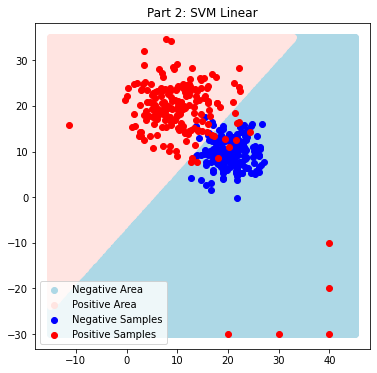

In [12]:
#SVM Linear
svm_linear = SVC(kernel='linear',probability=True)
hist = svm_linear.fit(X, y)

#Plotting SVM Linear
xlim = (-15,45)
ylim = (-30,35)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))

mesh = np.c_[xx.ravel(), yy.ravel()]
prob = svm_linear.predict_proba(np.c_[xx.ravel(), yy.ravel()])
pred0 = prob[:,0]
pred1 = prob[:,1]

label0 = pred0>pred1
label1 = pred1>pred0

plt.figure(1,figsize=(6,6))
plt.scatter(mesh[label0][:,0],mesh[label0][:,1],c='lightblue',label="Negative Area")
plt.scatter(mesh[label1][:,0],mesh[label1][:,1],c='mistyrose',label="Positive Area")
plt.scatter(X[y==-1][:,0],X[y==-1][:,1],c='b',label="Negative Samples")
plt.scatter(X[y==1][:,0],X[y==1][:,1],c='r',label="Positive Samples")
plt.title('Part 2: SVM Linear')
plt.legend(loc='lower left')
plt.show()